# SOMs testing with model M5b

This notebook test SOMs with another set of parameter

dim = 40
<br />iter_cnt = 3700
<br />learning rate = 0.341101 
<br />sigma = 1.896552


In [60]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import SOMsHelpers as sh
from acse_9_irp_wafflescore import FCMHelpers as fh
from acse_9_irp_wafflescore import dataPreprocessing as dp

import numpy as np
from timeit import default_timer as timer

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tested with model with smaller anomaly (M5b)

In [54]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

In [3]:
means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

In [43]:
dim, iter_cnt, lr, sigma = (40, 3700, 0.341101, 1.896552)
som, cluster_labels = sh.run_SOMs(norm_data, dim, iter_cnt, lr, sigma)
n_map = som.neuron_map(norm_data)

2019-08-28 23:17:30,503 | INFO : Not enough labeled neighbor to perform KNN.
                      Will return the original inputted value.


/anaconda3/lib/python3.6/site-packages/skimage/segmentation/random_walker_segmentation.py:407: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


The number of cluster is too low, n_cluster = 1 
Return an average score of -1 by default.
The number of cluster is too low, n_cluster = 1 
Return an average score of -1 by default.


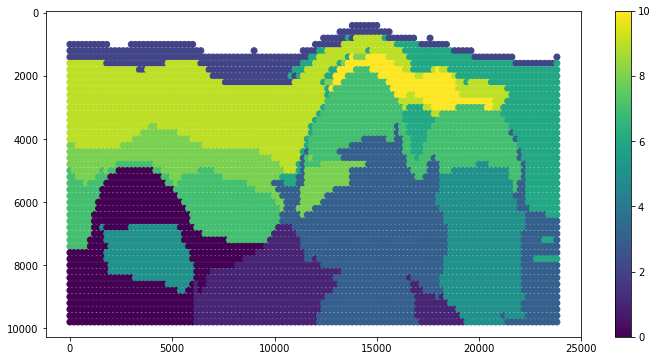

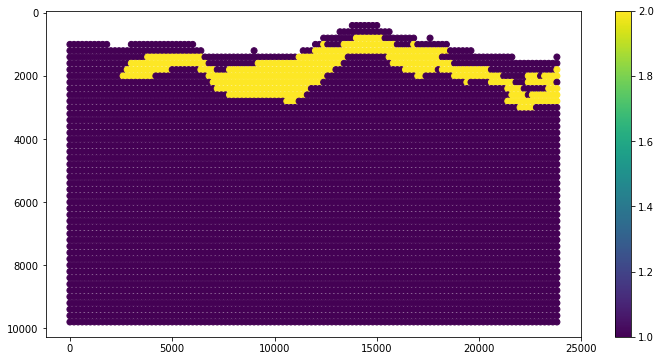

In [52]:
for c in cluster_labels:
    mh.plot_e_model(c, x, z)

The first result seems to be better, though does not represent the Earth model as good as the model seen in notebook SOMs - M5b v1.0

Still, we will experiment this result with other clustering methods to see the difference.

# SOMs with application of HDBScan
Since SOMs is a neural network that generates a u-matrix, this matrix could then be used as an input for other classification method.

## SOMs with HDBScan

In [ ]:
from acse_9_irp_wafflescore import HDBScanHelpers as hp
import hdbscan

In [36]:
# parameter Tuning
cluster_labels, avg_sils, avg_ch, min_size, min_sam = hp.random_search_hdb(n_map, (20,5), max_eval=20, rand_range=(50,50))

2019-08-28 22:37:32,206 | INFO : Random search using min_size = 18, min_sam = 32 result to very small / large number of clusters (n_clusters = 33)
2019-08-28 22:37:32,987 | INFO : min_size=19, min_sam=41, sil=-0.242193, ch=166.850439
2019-08-28 22:37:33,037 | INFO : Random search using min_size = 18, min_sam = 18 result to very small / large number of clusters (n_clusters = 52)
2019-08-28 22:37:33,717 | INFO : min_size=19, min_sam=36, sil=-0.147052, ch=259.487937
2019-08-28 22:37:34,408 | INFO : min_size=19, min_sam=46, sil=-0.187069, ch=317.419462
2019-08-28 22:37:34,452 | INFO : Random search using min_size = 18, min_sam = 7 result to very small / large number of clusters (n_clusters = 52)
2019-08-28 22:37:34,498 | INFO : Random search using min_size = 19, min_sam = 25 result to very small / large number of clusters (n_clusters = 33)
2019-08-28 22:37:34,543 | INFO : Random search using min_size = 18, min_sam = 20 result to very small / large number of clusters (n_clusters = 44)
2019-

0.14906563601410014 1802.9481611703893 41.0 7.0


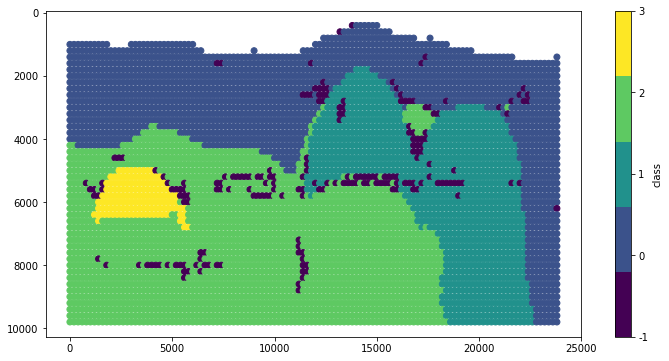

-0.11613369337318041 563.2727491234241 31.0 23.0


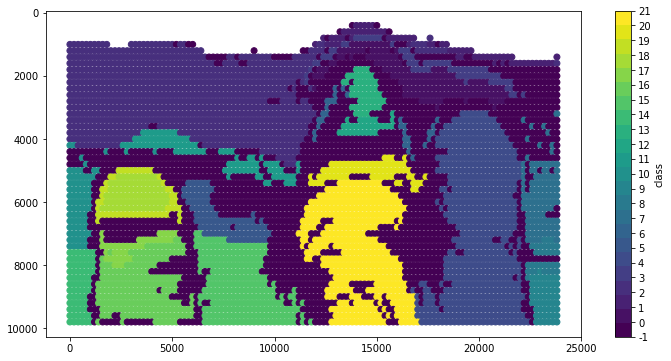

0.02382177392564231 751.2922520813713 47.0 28.0


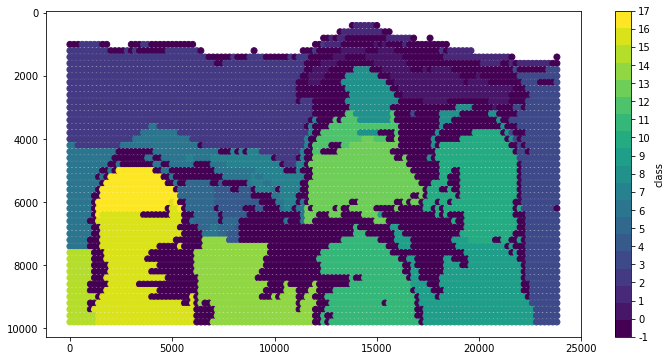

In [21]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

In [ ]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

While the result is not ideal, it is better than the result obtained in notebook v1.0

# SOMs with Fuzzy C Mean

2019-08-29 00:21:41,755 | INFO : FCM elapsed time: 20.549045
2019-08-29 00:21:42,493 | INFO : sil=0.400105, chs=5708.274450
2019-08-29 00:22:45,054 | INFO : FCM elapsed time: 62.559962
2019-08-29 00:22:45,904 | INFO : sil=0.333607, chs=5514.844592
2019-08-29 00:24:41,654 | INFO : FCM elapsed time: 115.748029
2019-08-29 00:24:42,316 | INFO : sil=0.353796, chs=5870.904009
2019-08-29 00:27:51,055 | INFO : FCM elapsed time: 188.736057
2019-08-29 00:27:51,646 | INFO : sil=0.320144, chs=5528.812055


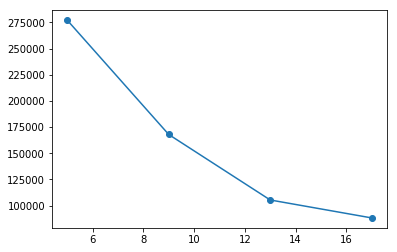

In [58]:
n_classes = range(5, 20, 4)
fcms, pred_mems, SSE, avg_sils, ch_scs, best_idx = fh.iter_n_class(n_map, n_classes)

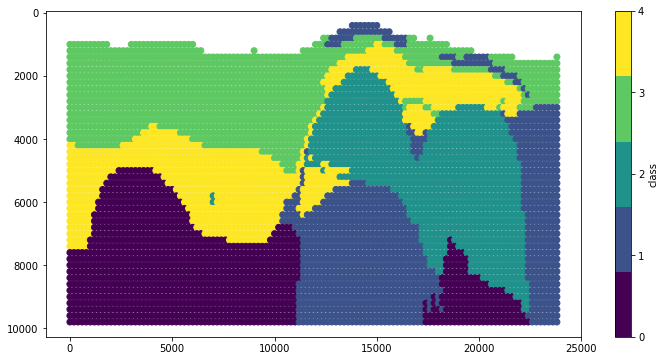

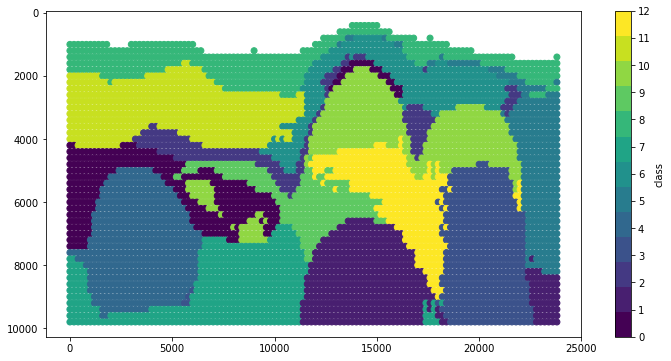

In [59]:
for i, p in enumerate(pred_mems):
    if(i in best_idx):
        fh.plot_best_fuzz(p, x, z)

# SOMs with K-mean clustering


2019-08-29 01:05:19,208 | INFO : sil=0.405101, chs=5889.725343
2019-08-29 01:05:19,906 | INFO : sil=0.401792, chs=6216.050358
2019-08-29 01:05:20,622 | INFO : sil=0.402028, chs=6392.466802
2019-08-29 01:05:21,342 | INFO : sil=0.402308, chs=6326.300868
2019-08-29 01:05:21,995 | INFO : sil=0.399802, chs=6436.233286
2019-08-29 01:05:22,670 | INFO : sil=0.393053, chs=6417.930471
2019-08-29 01:05:23,362 | INFO : sil=0.391730, chs=6471.796546
2019-08-29 01:05:24,022 | INFO : sil=0.400752, chs=6701.992123
2019-08-29 01:05:24,660 | INFO : sil=0.397273, chs=6864.923059
2019-08-29 01:05:25,288 | INFO : sil=0.400682, chs=6978.022662
2019-08-29 01:05:25,960 | INFO : sil=0.405455, chs=7059.088029
2019-08-29 01:05:26,679 | INFO : sil=0.408640, chs=7105.036777
2019-08-29 01:05:27,488 | INFO : sil=0.395987, chs=6923.314253
2019-08-29 01:05:28,300 | INFO : sil=0.399982, chs=7028.296044
2019-08-29 01:05:29,087 | INFO : sil=0.398329, chs=6974.657240


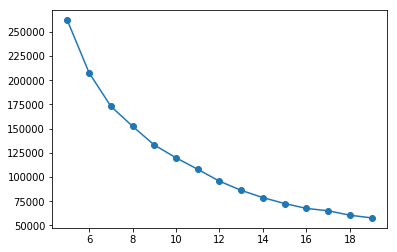

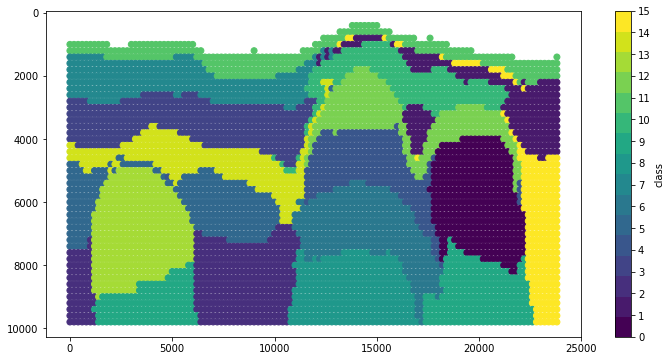

In [62]:
in_range = range(5, 20)
cluster_labels, avg_sils, ch_scs, SSE, best_idx = mh.iter_kmean(n_map, in_range)

for c in cluster_labels[best_idx]:
    mh.plot_e_model(c, x, z, sep_label=True)